# Setup 💻 (do not forget to run these cells before starting 👇)

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Spotify dataset

In [2]:
df = pd.read_csv('https://storage.googleapis.com/introduction-to-data-science/spotify-dataset.csv')

----------

# Your Assignement starts here 🔥

## 1. Can you display the first 10 row of the dataset?

In [3]:
df[0:10]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.1970,0,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.988,['Carl Woitschach'],0.555,153967,0.4210,0,6OJjveoYwJdIt76y0Pxpxw,0.836,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928


## 2. Are there any missing values in the dataset?

In [4]:
df.isnull().sum()

,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0
key,0
liveness,0


## 3. How many songs are there in the dataset?

In [7]:
df['name'].shape

(169909,)

## 4. How many artists?

In [25]:
import ast
parsed_artists = df['artists'].apply(ast.literal_eval)
all_artists = [artist.strip() for sublist in parsed_artists for artist in sublist]
unique_artist_count = len(set(all_artists))
(f"Number of unique artists: {unique_artist_count}")

'Number of unique artists: 27620'

## 5. What's the average duration of a song, in minutes?

In [24]:
average_duration = (df['duration_ms'] / 60000).mean()
(f"Average song duration: {average_duration:.2f} minutes")

'Average song duration: 3.86 minutes'

## 6. Can you plot the distribution of the durations?

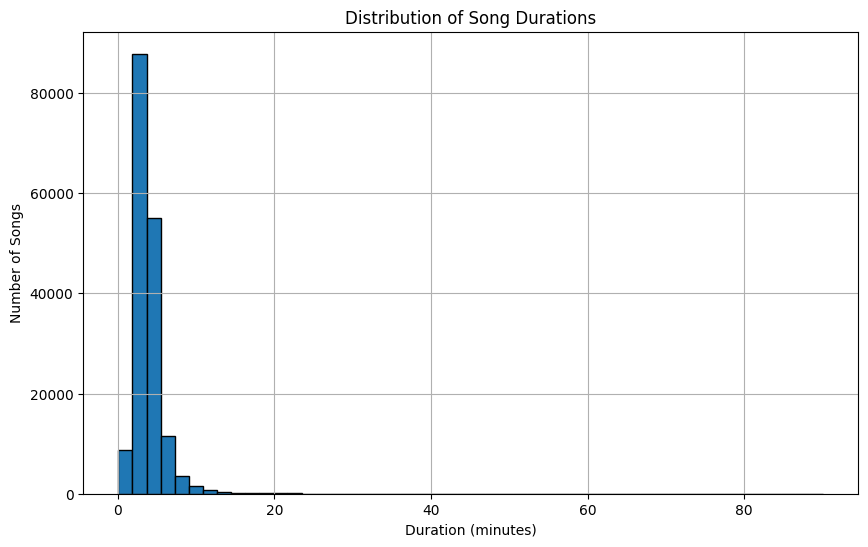

In [34]:
df['duration_min'] = df['duration_ms'] / 60000
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=50, edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()


## 7. [Follow-up] Can you make this plot more readable by removing outliers (extreme values)?

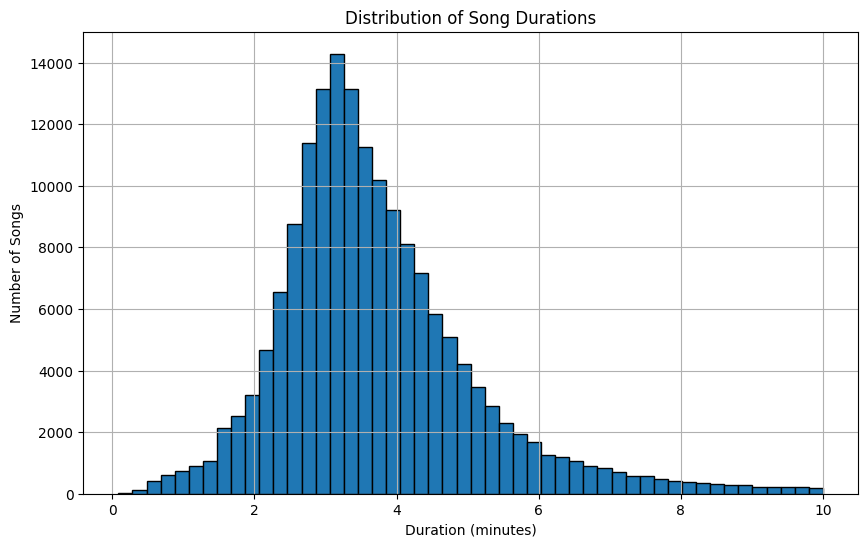

In [33]:
df['duration_min'] = df['duration_ms'] / 60000
filtered_df = df[df['duration_min'] < 10]
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['duration_min'], bins=50, edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

We only remove 470 songs (out of almost 170k) and get a way more interesting plot!

## 8. What are the top 10 longest songs (duration)?

In [37]:
df.nlargest(10, 'duration_ms')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min
7411,0.111000,['Sound Dreamer'],0.0000,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392000,2,0.1370,-21.669,1,Brown Noise - 90 Minutes,50,2013-06-05,0.0000,0.000,0.000000,2013,90.058333
46972,0.975000,['Sounds for Life'],0.1530,4270034,0.079200,0,605JTCltCe1IcqrGXQ294K,1.000000,10,0.1130,-23.962,0,Brown Noise for Sleep,42,2009-03-15,0.1250,132.904,0.000537,2009,71.167233
54511,0.000385,"['Lightning, Thunder and Rain Storm']",0.1160,4269407,0.338000,0,7dYf0CsWHDLvlP6HJPs3zO,0.093500,1,0.3420,-36.638,1,Midnight Thunderstorm Part 2,44,2009-09-22,0.0648,94.453,0.029300,2009,71.156783
54675,0.932000,['Ocean Sounds'],0.0797,4120258,0.995000,0,2QfFLpSGF1T1pY6tq4kD7Z,0.562000,1,0.3100,-17.379,1,Ocean Waves Sounds,44,2010-07-16,0.0612,84.788,0.000010,2010,68.670967
125152,0.932000,['Ocean Waves For Sleep'],0.0797,4120258,0.995000,0,1saXdvEAafdRzUphXBzSHg,0.562000,1,0.3100,-17.379,1,Ocean Waves for Sleep,55,2010-07-16,0.0612,84.788,0.000010,2010,68.670967
38491,0.003670,['Sleep'],0.1600,3816373,0.572000,0,1vhvheW4R0KbK6Kr3NFplW,0.745000,5,0.0952,-6.949,1,Dopesmoker,43,2003,0.0321,96.926,0.093200,2003,63.606217
140784,0.976000,['Brian Eno'],0.0918,3650800,0.056900,0,4t3Yh6tKkxXrc458pNI7zZ,0.884000,0,0.0842,-31.808,1,Thursday Afternoon - 2005 Digital Remaster,39,1985-10-01,0.0358,81.944,0.052800,1985,60.846667
72889,0.601000,['Environments'],0.1590,3557955,0.562000,0,2rRuuVflvA23Fcl8KezNAF,0.611000,10,0.1070,-22.135,0,The Psychologically Ultimate Seashore (16 rpm),19,1969-01-01,0.1600,129.863,0.012600,1969,59.299250
10573,0.900000,['Umm Kulthum'],0.4100,3551152,0.451000,0,0AsT5HMyXuqa8qWMLv0YZb,0.000034,8,0.7030,-10.213,0,Enta Oumry,26,1964-02-06,0.1260,118.125,0.408000,1964,59.185867
118777,0.891000,['Umm Kulthum'],0.3450,3523619,0.723000,0,1gXsu5iZHLpUr1zvXEfOxw,0.769000,9,0.3930,-7.801,1,Naheg El Berda,0,1946-01-01,0.0996,115.550,0.299000,1946,58.726983


## 9. How long would it take to listen to all the songs?

In [39]:
total_ms = df['duration_ms'].sum()
total_days = total_ms / 86400000  # 86,400,000 ms in a day
(f"Total duration of all songs: {total_days:.2f} days")

'Total duration of all songs: 455.07 days'

This length is expressed in milliseconds, let's convert to days!

## 10. What are the top 10 most popular songs? We would like a DataFrame with only the columns `artists`, `name` and `popularity` as output!

In [42]:
df.nlargest(10, 'popularity')[['artists', 'name', 'popularity']]

,artists,name,popularity
87942,['The Weeknd'],Blinding Lights,100
87940,"['DaBaby', 'Roddy Ricch']",ROCKSTAR (feat. Roddy Ricch),99
87949,"['Powfu', 'beabadoobee']",death bed (coffee for your head) (feat. beabad...,97
87941,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",THE SCOTTS,96
87840,['Roddy Ricch'],The Box,95
87844,"['BENEE', 'Gus Dapperton']",Supalonely,95
87852,"['Surf Mesa', 'Emilee']",ily (i love you baby) (feat. Emilee),95
87946,['Drake'],Toosie Slide,95
87858,['Tones And I'],Dance Monkey,94
87943,['StaySolidRocky'],Party Girl,94


## 11. What is the most popular song before 2000?

In [46]:
filtered_df = df[df['year'] < 2000]
filtered_df.nlargest(1, 'popularity')[['name', 'popularity', 'year']]

,name,popularity,year
82840,Here Comes The Sun - Remastered 2009,83,1969


## 12. Can you plot the distribution of `popularity`?

In [ ]:
# Your code goes here 💪

## 13. What are the top 10 artists in terms of number of songs?

In [ ]:
# Your code goes here 💪

## 14. [Follow-up] can you make a bar chart out of this result?

In [ ]:
# Your code goes here 💪

## 15. How many songs by key?

In [ ]:
# Your code goes here 💪

## 16. [Follow-up] Can you plot a bar chart using Seaborn? Make sure the keys are sorted in a descending order.

In [ ]:
# Your code goes here 💪

## 17. Can you plot a line graph representing the annual number of songs since 1921?

In [ ]:
# Your code goes here 💪

Last question! 👇

## 18. Can you visually check if there is relationship between `year` and `popularity`?

In [ ]:
# Your code goes here 💪

It seems that the popularity score has increased through time....